## Atividade Avaliativa 2
Nesta atividade avaliativa você usará o dataset 'carros_usados', que traz informações sobre carros usados disponíveis para venda em diversos estados americanos.

In [82]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('carros_usados.csv')
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


### Questão 1
Crie um gráfico de barras que mostre o preço médio dos carros nacionais ('Domestic') e importados ('Import'), por categoria (vehicle.type).

In [87]:
df2 = pd.crosstab(df['vehicle.type'], df['domestic.import'], values=df['total.cost'], aggfunc='mean')
df2

domestic.import,Domestic,Import
vehicle.type,,
ECONOMY,4655.052298,4671.540541
FAMILY.LARGE,5067.242647,6728.545455
FAMILY.MEDIUM,4925.442958,5365.718220
FAMILY.SMALL,4886.618243,4953.875175
LUXURY,5187.587963,5200.369251


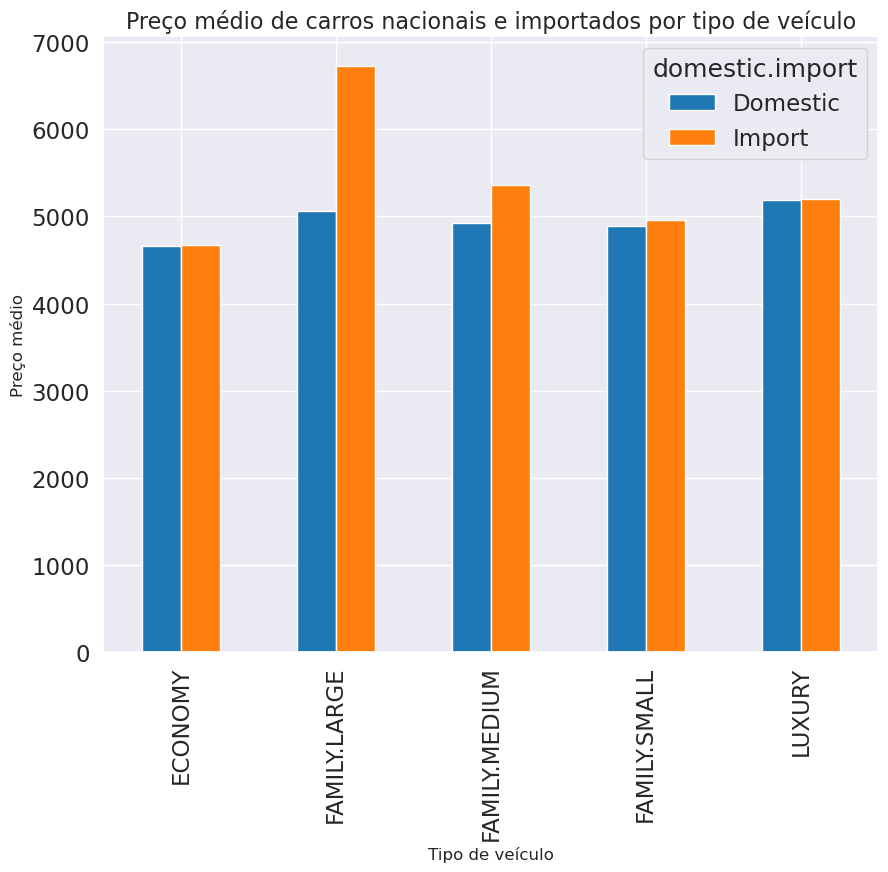

In [88]:
plt.rcParams["figure.figsize"] = [10,8]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
df2.plot(kind="bar",stacked=False)
plt.title("Preço médio de carros nacionais e importados por tipo de veículo")
plt.xlabel("Tipo de veículo")
plt.ylabel("Preço médio")
plt.show()

### Questão 2
Crie um gráfico de pizza que mostre a porcentagem de carros a venda do estado da California (CA) por cor (color.set).

In [89]:
df3 = pd.crosstab(df['color.set'], df['state'])
df3

state,AZ,CA,FL,GA,NM,NV,TX,VA
color.set,,,,,,,,
BLACK,33,126,90,46,19,7,110,38
BLUE,159,242,231,98,40,42,241,100
GOLD,104,132,154,57,12,19,156,54
GREEN,190,313,273,143,27,39,339,107
PURPLE,110,175,137,89,23,36,176,71
RED,94,113,126,68,17,17,133,46
SILVER,119,139,128,74,24,19,161,57
WHITE,273,293,318,157,61,70,334,96


In [90]:
df4 = df3['CA'].reset_index()
df4

,color.set,CA
0,BLACK,126
1,BLUE,242
2,GOLD,132
3,GREEN,313
4,PURPLE,175
5,RED,113
6,SILVER,139
7,WHITE,293


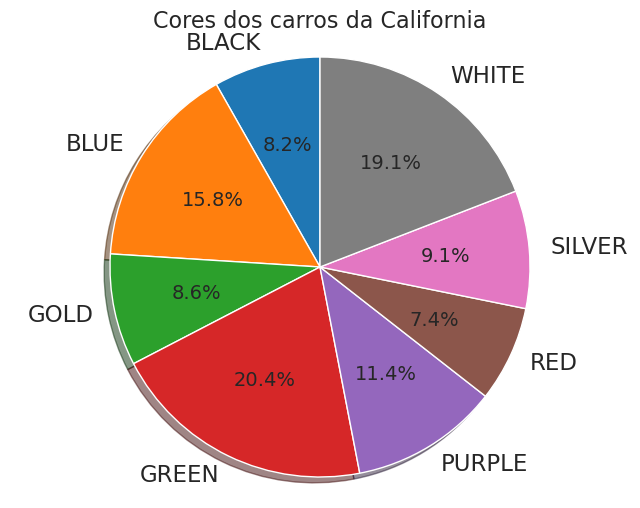

In [91]:
sizes = df4['CA']
labels = df4['color.set']
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")
plt.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Cores dos carros da California')
plt.axis('equal')
plt.show()

### Questão 3
Crie um gráfico de dispersão que mostre a relação entre a idade do veículo (vehicle.age) e seu preço (total.cost). Considere apenas veículos do tipo FAMILY.LARGE.

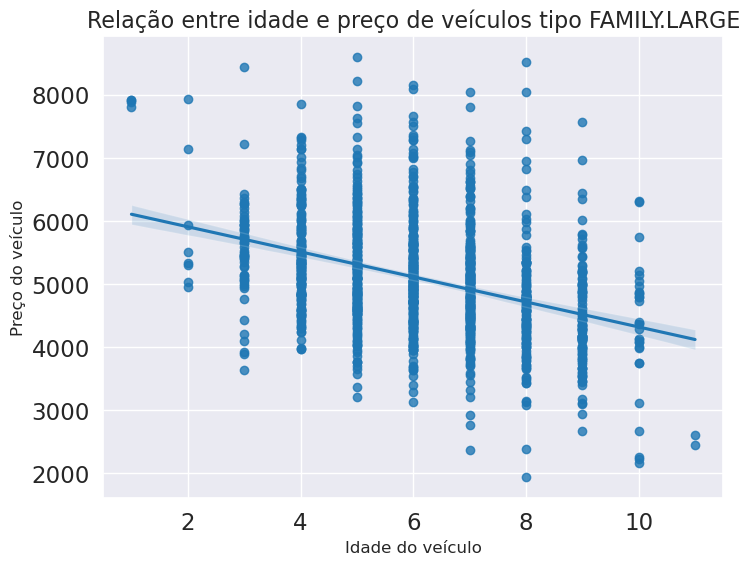

In [93]:
df5 = df[df['vehicle.type'] == 'FAMILY.LARGE']
sns.regplot(x="vehicle.age", y="total.cost", fit_reg=True, data=df5)
plt.title("Relação entre idade e preço de veículos tipo FAMILY.LARGE")
plt.xlabel("Idade do veículo")
plt.ylabel("Preço do veículo")
plt.show();

### Questão 4
Crie um gráfico de barras que mostre o preço médio dos modelos (make.model) de carro da Toyota.

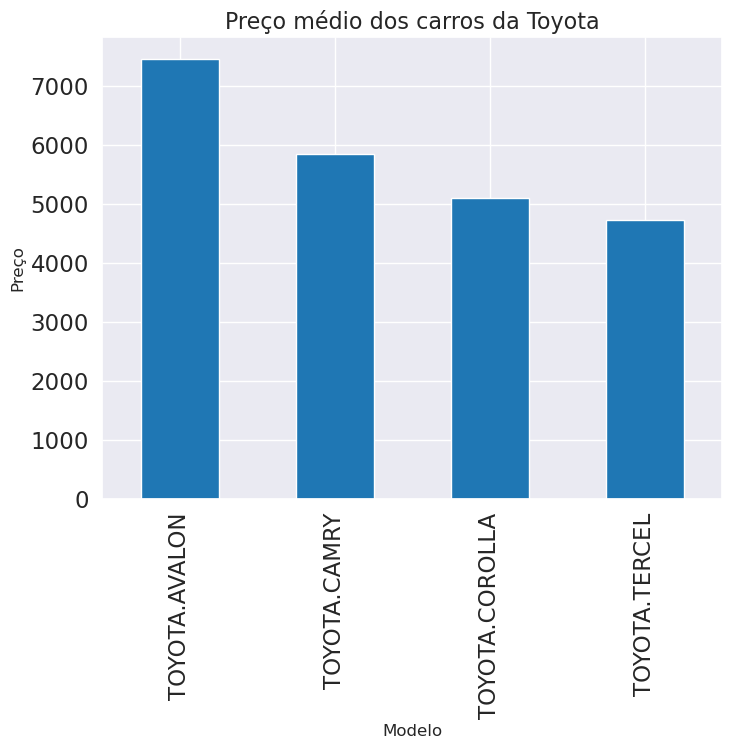

In [94]:
df6 = df[df['makex'] == 'TOYOTA']
df7 = df6.groupby('make.model')['total.cost'].mean()
df7.plot(kind="bar",stacked=False)
plt.title("Preço médio dos carros da Toyota")
plt.ylabel("Preço")
plt.xlabel("Modelo")
plt.show()

### Questão 5
Crie um gráfico de barras que mostre o valor dos carros mais caros de cada tipo de veículo (vehicle.type) das marcas japonesas, que são: 'HONDA', 'MAZDA', 'MITSUBISHI', 'NISSAN' e 'TOYOTA'.

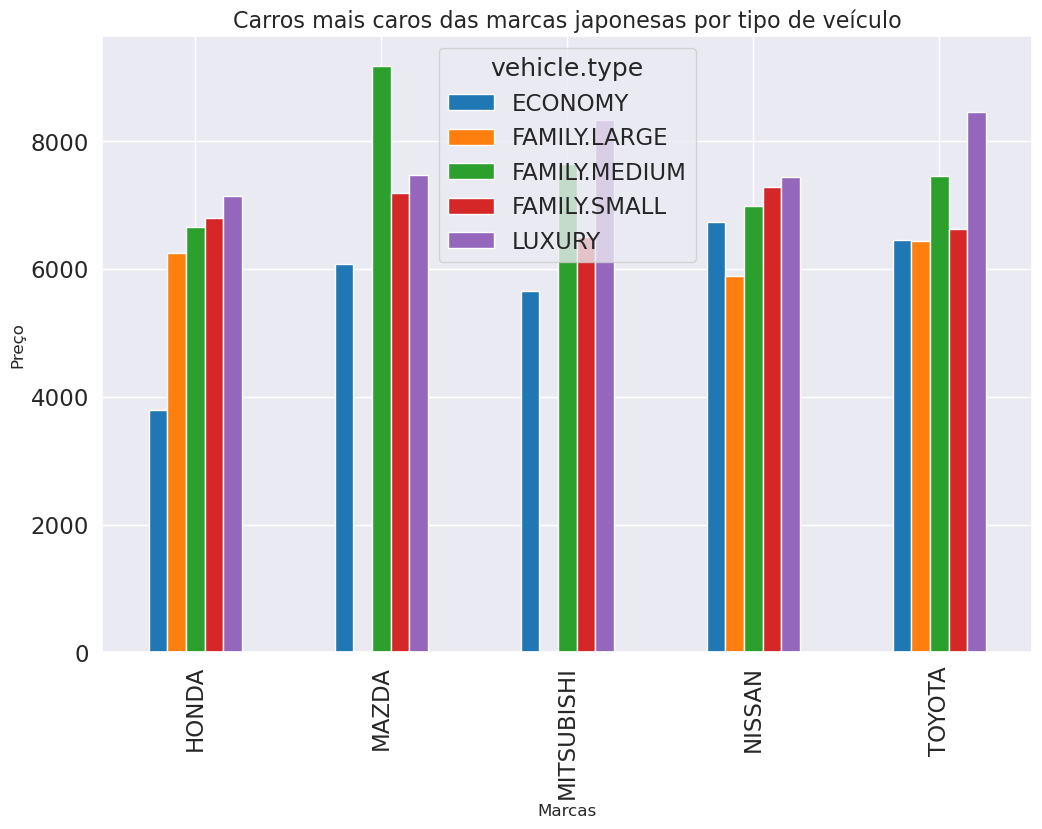

In [96]:
df7 = df[df['makex'].isin(['HONDA', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'TOYOTA'])]
df8 = pd.crosstab(df7['makex'], df7['vehicle.type'], values=df7['total.cost'], aggfunc='max')

plt.rcParams["figure.figsize"] = [12,8]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
df8.plot(kind="bar",stacked=False)
plt.title("Carros mais caros das marcas japonesas por tipo de veículo")
plt.ylabel("Preço")
plt.xlabel("Marcas")
plt.show()

### Questão 6
Crie dois histogramas lado a lado que mostrem a distribuição de preços dos veículos das marcas HONDA e HYUNDAI. Use axvline = 5000 e bins = 12.

In [119]:
df2 = df[df['makex'] == 'HONDA']
df3 = df[df['makex'] == 'HYUNDAI']

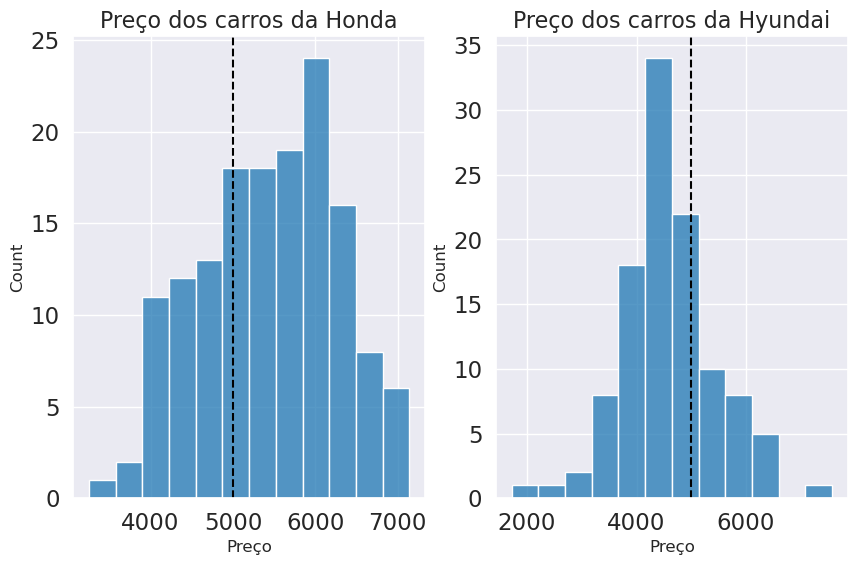

In [122]:
plt.rcParams["figure.figsize"] = [10,6]
sns.set_style("darkgrid")
plt.subplot(1,2,1)
#sns.displot(df1['CPI_2014'], bins=15, kde=False)

sns.histplot(df2['total.cost'], bins=12, kde=False)

plt.title("Preço dos carros da Honda")
plt.xlabel("Preço")
plt.axvline(5000,color="k",linestyle="--")
plt.subplot(1,2,2)


sns.histplot(df3['total.cost'], bins=12, kde=False)

plt.title("Preço dos carros da Hyundai")
plt.xlabel("Preço")
plt.axvline(5000,color="k",linestyle="--")
plt.show()

### Questão 7
O dataset contém a coluna 'vehicle.age.group' que agrupa os carros de acordo com a idade. Crie dois gráficos de pizza lado a lado que exibam a porcentagem de veículos de cada grupo de idade para os estados da Califórnia (CA) e da Georgia (GA).

In [127]:
df4 = df[df['state'].isin(['CA', 'GA'])]
df5 = pd.crosstab(df4['vehicle.age.group'], df4['state'])
df5

state,CA,GA
vehicle.age.group,,
FIVE,363,181
FOUR,273,169
ONE-THREE,144,85
SEVEN+,429,156
SIX,324,141


In [ ]:
df6 = df5.reset_index()
df6

state,vehicle.age.group,CA,GA
0,FIVE,363,181
1,FOUR,273,169
2,ONE-THREE,144,85
3,SEVEN+,429,156
4,SIX,324,141


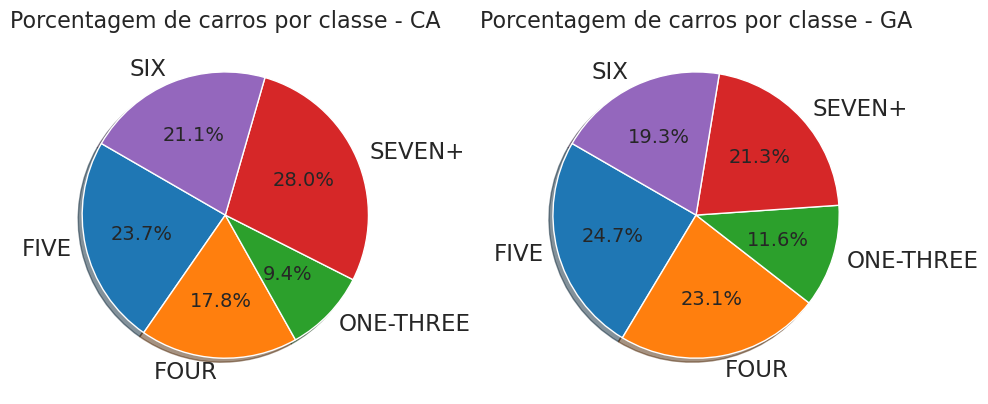

In [134]:
labels = df6['vehicle.age.group']
sizes_CA = df6['CA']
sizes_GA = df6['GA']

plt.rcParams["figure.figsize"] = [10,8]
sns.set_style("darkgrid")

plt.subplot(1,2,1)
plt.pie(sizes_CA, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("Porcentagem de carros por classe - CA")
plt.subplot(1,2,2)
plt.pie(sizes_GA, labels=labels, autopct ='%1.1f%%', shadow=True, startangle=150)
plt.title("Porcentagem de carros por classe - GA")
plt.tight_layout()
plt.show()